# Deskewing artifacts when not using orthogonal interpolation

In this notebook we demonstrate what happens if not using interpolation when deskewing an image stack: The result is produced faster and contains artifacts.

For deskewing, we are using the orthogonal projection as proposed by Sapoznik et al.
* https://github.com/QI2lab/OPM/blob/master/reconstruction/image_post_processing.py#L34
* Sapoznik et al. (2020) A versatile oblique plane microscope for large-scale and high-resolution imaging of subcellular dynamics eLife 9:e57681. https://doi.org/10.7554/eLife.57681

In [1]:
from skimage.io import imread
import matplotlib.pyplot as plt
import pyclesperanto_prototype as cle

cle.select_device("RTX")

c:\users\rajasekhar.p\onedrive - wehi.edu.au\wehi_projects\lightsheet\pyclesperanto_prototype\pyclesperanto_prototype\_tier0\_device.py:77: UserWarning: No OpenCL device found with RTX in their name. Using Quadro P400 instead.
  warnings.warn(f"No OpenCL device found with {name} in their name. Using {device.name} instead.")


<Quadro P400 on Platform: NVIDIA CUDA (1 refs)>

In [2]:
cle.__version__

'0.23.2'

## Loading example data

In [3]:
voxel_size_x_in_microns = 0.1449922
voxel_size_y_in_microns = 0.1449922
voxel_size_z_in_microns = 0.3

deskewing_angle_in_degrees = 30

The example image data shown below was kindly provided by 
[Ms Cindy Evelyn](https://imaging.wehi.edu.au/about-us/niall-geoghegan) and [Dr Niall Geoghegan](https://imaging.wehi.edu.au/about-us/niall-geoghegan) from the [Centre for Dynamic Imaging, WEHI, Melbourne, Australia](https://imaging.wehi.edu.au/) who used lattice light sheet microscopy to capture red blood cells and study the [malaria parasite invasion process](https://www.nature.com/articles/s41467-021-23626-7). The data is acquired using a Zeiss lattice lightsheet microscope.

In these so called raw data images taken with single-objective light sheet microscopes, the Z-plane is swept through the sample in a tilted way. This is not obvious when studying the Z-planes of the given stack:

In [4]:
original_image = imread('../../data/RBC_tiny.tif')
original_image.shape

(834, 118, 209)

To demonstrate the effect, we will now reduce the imaging data in Z; we remove planes and update the voxel size.

In [5]:
reduction_factor = 3

original_image = original_image[::reduction_factor]
voxel_size_z_in_microns = voxel_size_z_in_microns * reduction_factor

When looking at this image stack from the side, one can see the tilt of the light sheet orientation.

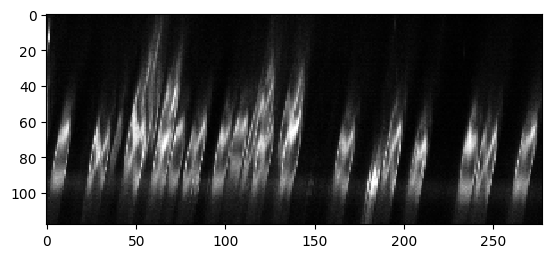

In [6]:
cle.imshow(original_image[:,:,100].T)

## Deskewing with orthogonal interpolation

In [7]:
deskewed = cle.deskew_y(original_image, 
                        angle_in_degrees=deskewing_angle_in_degrees, 
                        voxel_size_x=voxel_size_x_in_microns, 
                        voxel_size_y=voxel_size_y_in_microns, 
                        voxel_size_z=voxel_size_z_in_microns,
                        linear_interpolation=True)

deskewed.shape

(59, 1828, 209)

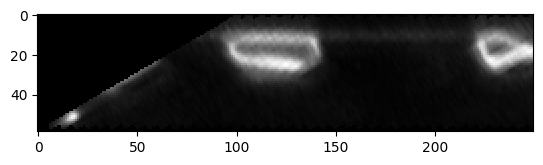

In [8]:
cle.imshow(deskewed[:,:250,100])

## Deskewing without orthogonal interpolation

In [9]:
deskewed_wo_interpolation = cle.deskew_y(original_image, 
                        angle_in_degrees=deskewing_angle_in_degrees, 
                        voxel_size_x=voxel_size_x_in_microns, 
                        voxel_size_y=voxel_size_y_in_microns, 
                        voxel_size_z=voxel_size_z_in_microns,
                        linear_interpolation=False)

deskewed_wo_interpolation.shape

c:\users\rajasekhar.p\onedrive - wehi.edu.au\wehi_projects\lightsheet\pyclesperanto_prototype\pyclesperanto_prototype\_tier8\_deskew_y.py:46: UserWarning: linear_interpolation = False is deprecated due to deskewing artifacts. The linear_interpolation parameter will be removed in a future version.
  warnings.warn("linear_interpolation = False is deprecated due to deskewing artifacts. The linear_interpolation parameter will be removed in a future version.")


(59, 1828, 209)

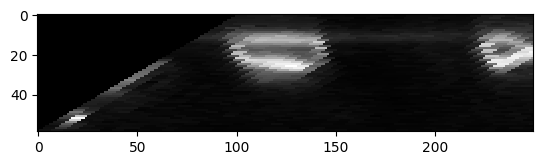

In [10]:
cle.imshow(deskewed_wo_interpolation[:,:250,100])

## Deskewing well z-sampled data
The artifact is still present but harder to discover in case voxels were sampled almost isotropically.

In [11]:
voxel_size_z_in_microns = 0.3

original_image = imread('../../data/RBC_tiny.tif')
original_image.shape

(834, 118, 209)

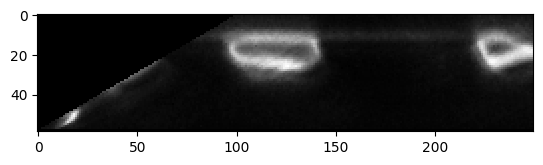

In [12]:
deskewed = cle.deskew_y(original_image, 
                        angle_in_degrees=deskewing_angle_in_degrees, 
                        voxel_size_x=voxel_size_x_in_microns, 
                        voxel_size_y=voxel_size_y_in_microns, 
                        voxel_size_z=voxel_size_z_in_microns,
                        linear_interpolation=True)

cle.imshow(deskewed[:,:250,100])

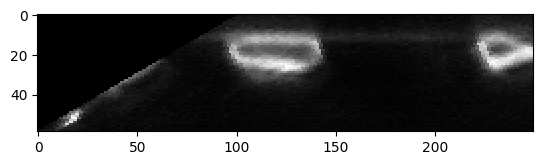

In [13]:
deskewed_wo_interpolation = cle.deskew_y(original_image, 
                        angle_in_degrees=deskewing_angle_in_degrees, 
                        voxel_size_x=voxel_size_x_in_microns, 
                        voxel_size_y=voxel_size_y_in_microns, 
                        voxel_size_z=voxel_size_z_in_microns,
                        linear_interpolation=False)

cle.imshow(deskewed_wo_interpolation[:,:250,100])

## Performance comparison

In [14]:
def deskew_with_interpolation():
    cle.deskew_y(original_image, 
                        angle_in_degrees=deskewing_angle_in_degrees, 
                        voxel_size_x=voxel_size_x_in_microns, 
                        voxel_size_y=voxel_size_y_in_microns, 
                        voxel_size_z=voxel_size_z_in_microns,
                        linear_interpolation=True)

def deskew_without_interpolation():
    cle.deskew_y(original_image, 
                        angle_in_degrees=deskewing_angle_in_degrees, 
                        voxel_size_x=voxel_size_x_in_microns, 
                        voxel_size_y=voxel_size_y_in_microns, 
                        voxel_size_z=voxel_size_z_in_microns,
                        linear_interpolation=False)

In [15]:
%timeit deskew_with_interpolation()

96.1 ms ± 2.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [16]:
%timeit deskew_without_interpolation()

88.4 ms ± 2.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
